In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pJ0PSgqApkuE81DDHE8w")
project = rf.workspace("project-kcfjp").project("car-cenpy")
dataset = project.version(3).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to car-3 in yolov5pytorch:: 100%|██████████| 190/190 [00:00<00:00, 1568.17it/s]


In [ ]:
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/166.8 GB disk)


In [ ]:
# !unzip -q ../train_data.zip -d ../

In [ ]:
#훈련
!python train.py --img 640 --batch 20 --epochs 5 --data /content/drive/MyDrive/datatest.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/datatest.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, 

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.35 --source /content/car-3/test/images/frame30_png.rf.87e63e5deb2a7380a1a86da753527e60.jpg

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/car-3/test/images/frame30_png.rf.87e63e5deb2a7380a1a86da753527e60.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/car-3/test/images/frame30_png.rf.87e63e5deb2a7380a1a86da753527e60.jpg: 448x640 (no detections), 11.7ms
Speed: 0.4ms pre-process, 11.7ms inference, 0.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


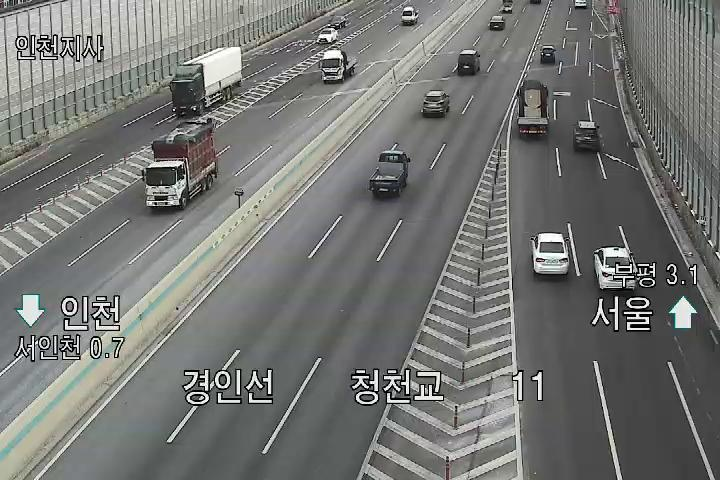

In [ ]:
Image('/content/yolov5/runs/detect/exp5/frame30_png.rf.87e63e5deb2a7380a1a86da753527e60.jpg')

In [ ]:
Image('/content/yolov5/runs/detect/exp4/capture.jpg')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [ ]:
# test
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source /content/capture105.jpg

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/capture105.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-43-gf72f0fe Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/capture105.jpg: 384x640 12 cars, 11.5ms
Speed: 0.5ms pre-process, 11.5ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp26


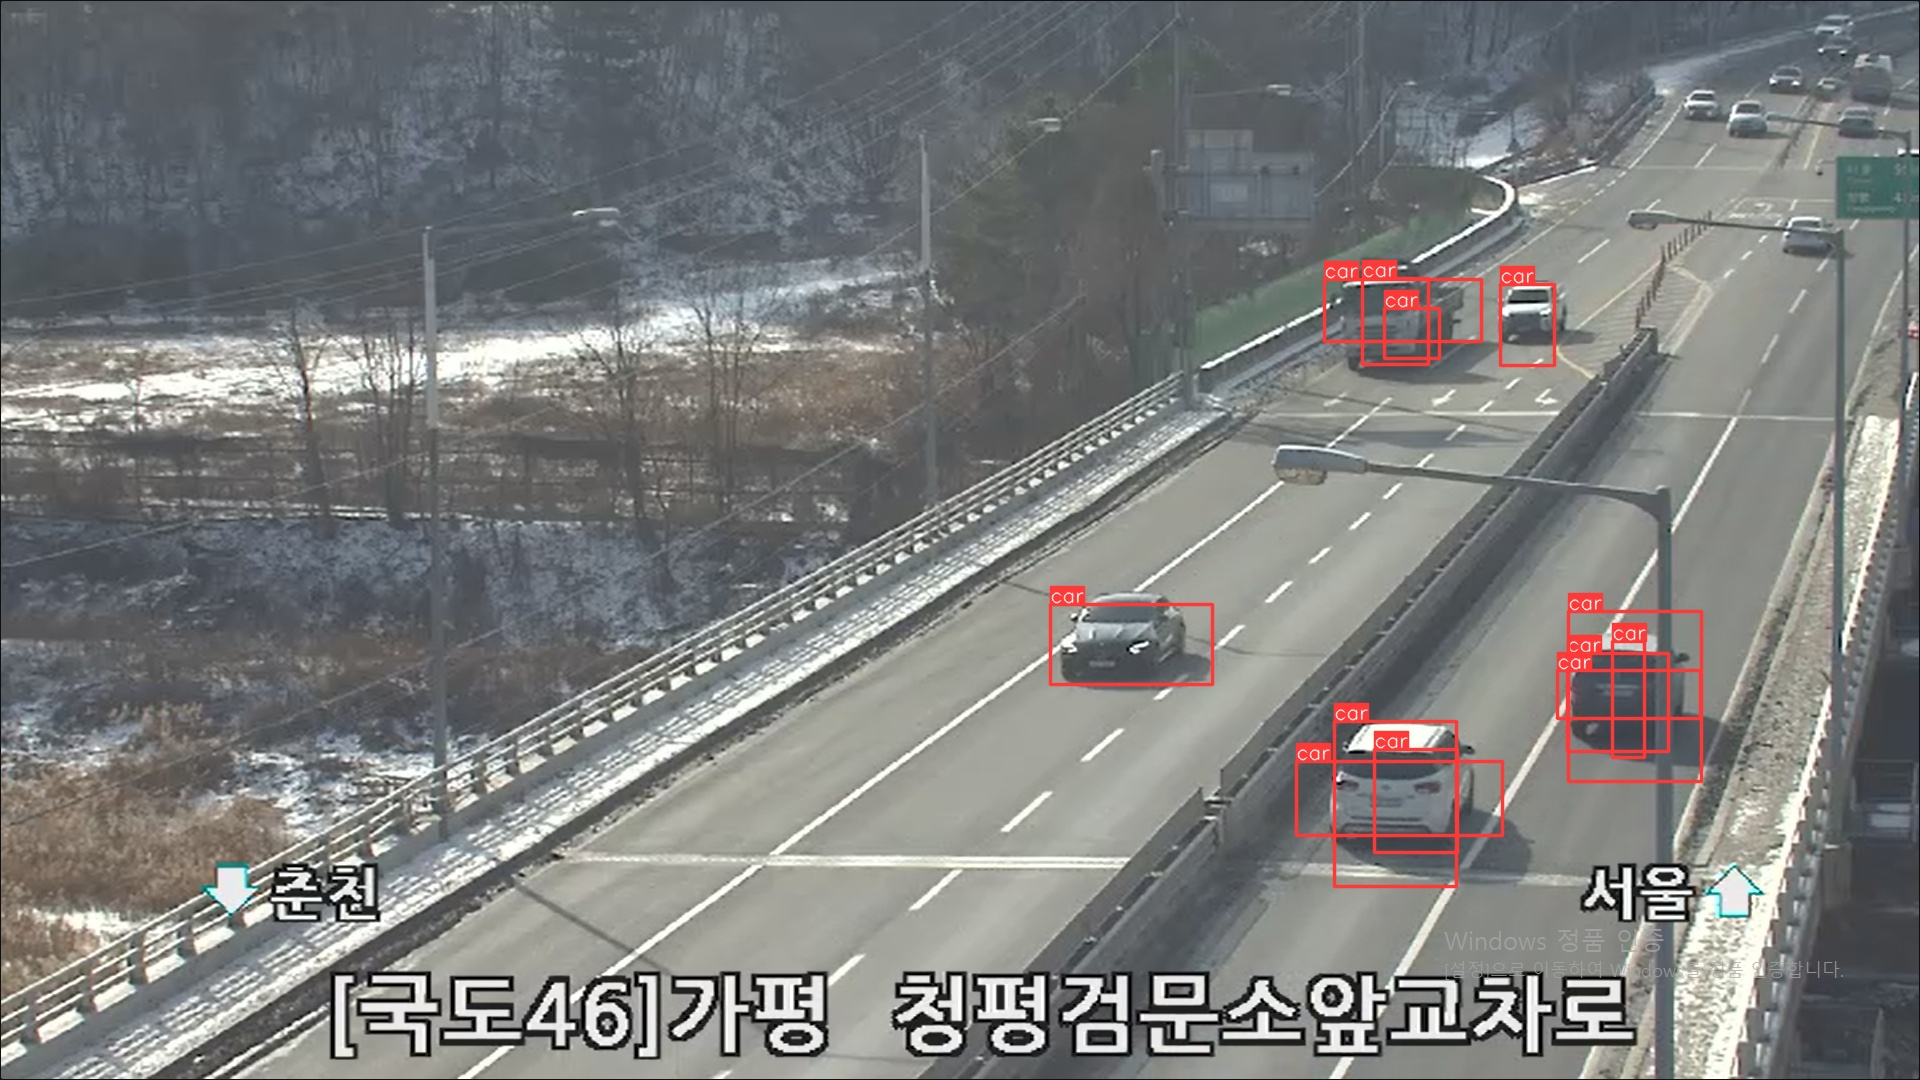

In [ ]:
Image('/content/yolov5/runs/detect/exp26/capture105.jpg')

In [ ]:
# test
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source /content/car-1/test/images/frame68_png.rf.e1006ec067bfef84e209f44c11ab5317.jpg

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/car-1/test/images/frame68_png.rf.e1006ec067bfef84e209f44c11ab5317.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-43-gf72f0fe Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/car-1/test/images/frame68_png.rf.e1006ec067bfef84e209f44c11ab5317.jpg: 640x640 52 cars, 12.6ms
Speed: 0.6ms pre-process, 12.6ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp32


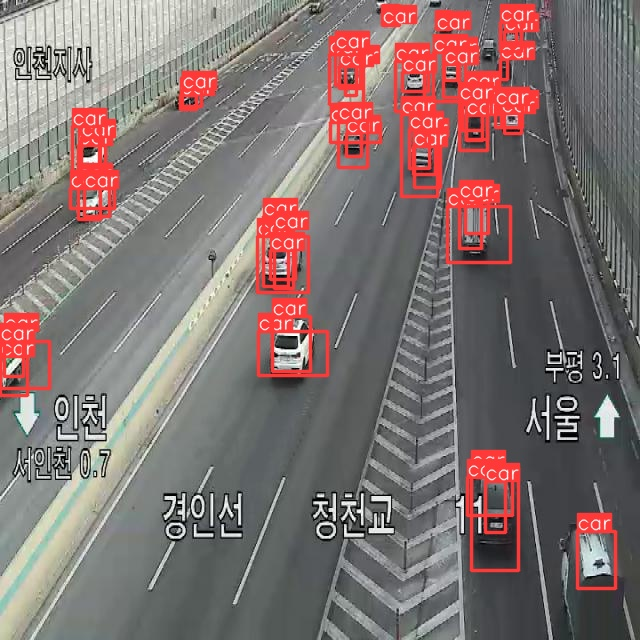

In [ ]:
Image('/content/yolov5/runs/detect/exp32/frame68_png.rf.e1006ec067bfef84e209f44c11ab5317.jpg')

In [ ]:
# test
!python detect.py --weights /content/yolov5/runs/train/exp3/weights/best.pt --img 640 --conf 0.35 --source /content/test_car_4.png

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/test_car_4.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-43-gf72f0fe Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_car_4.png: 384x640 4 cars, 12.0ms
Speed: 0.5ms pre-process, 12.0ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


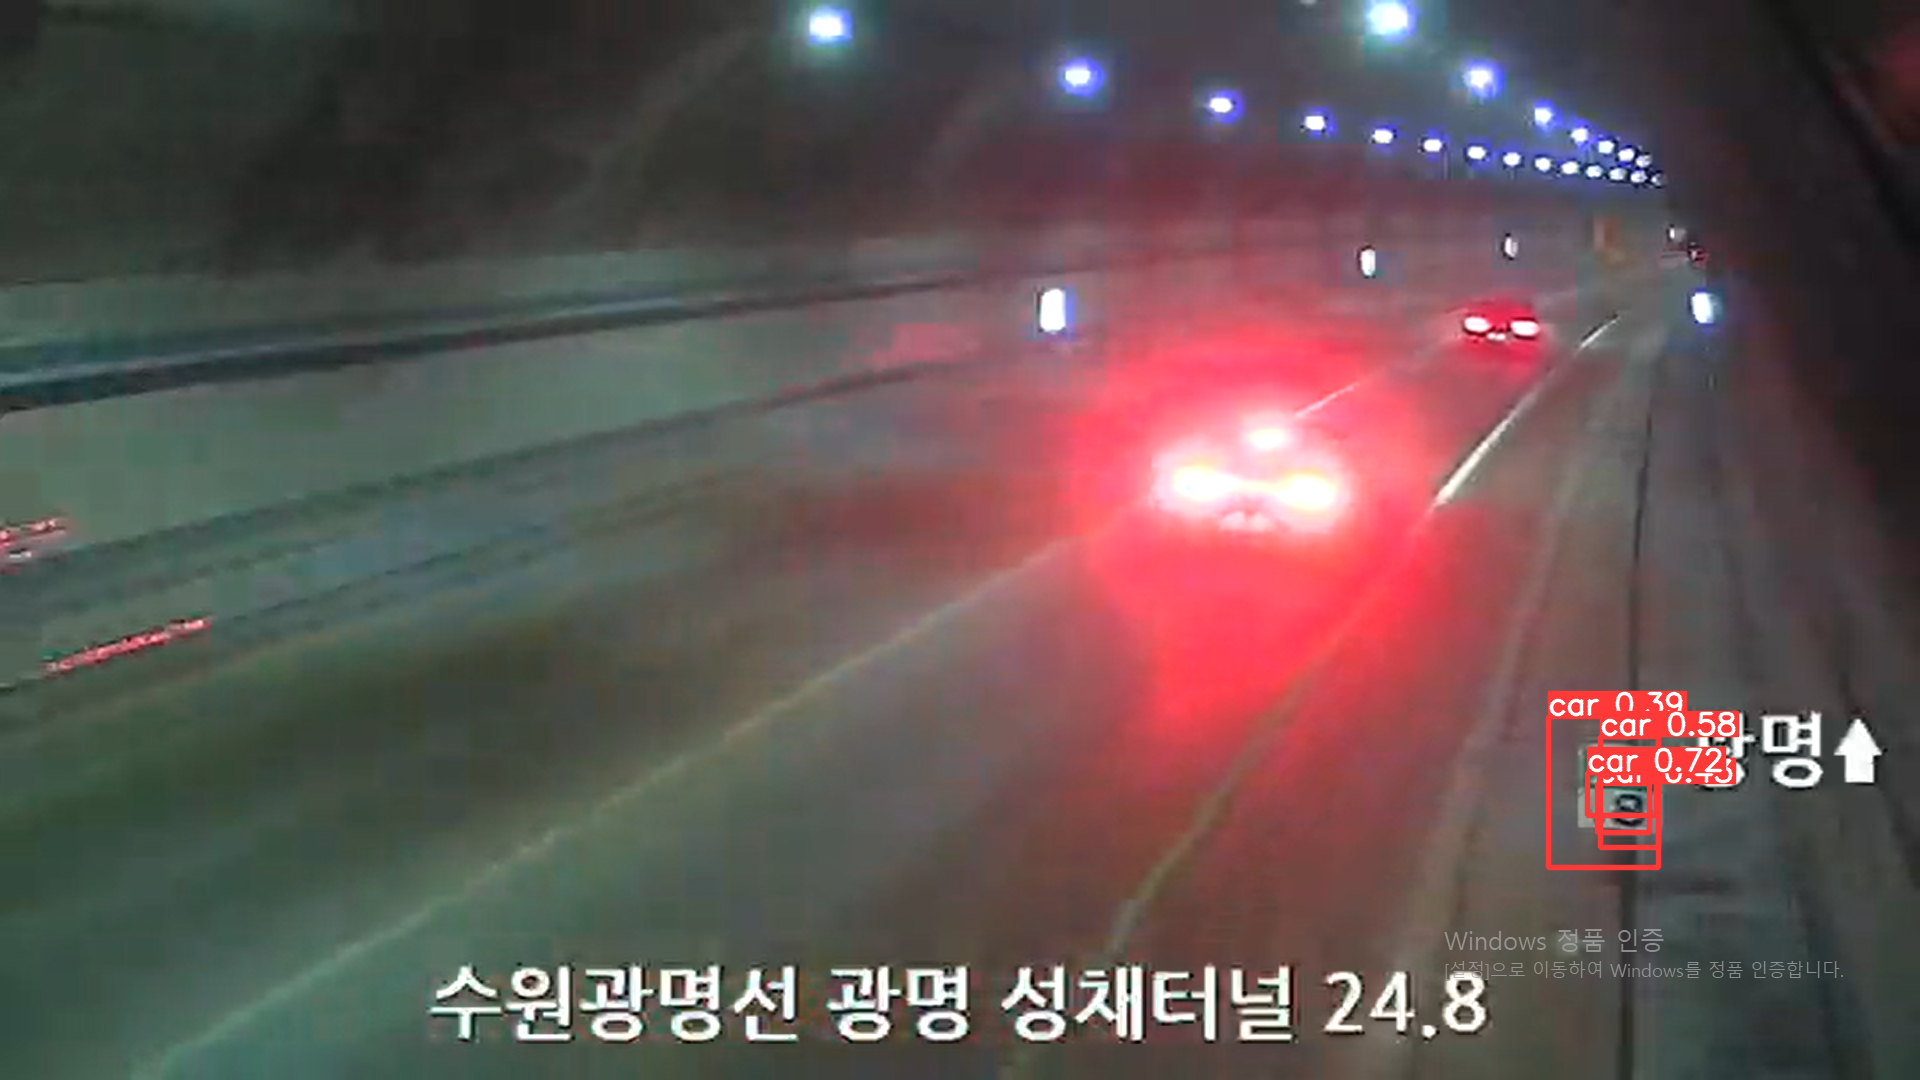

In [ ]:
Image('/content/yolov5/runs/detect/exp8/test_car_4.png')

In [ ]:
# test
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source /content/cctv_mp4.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/cctv_mp4.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-43-gf72f0fe Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/871) /content/cctv_mp4.mp4: 448x640 9 cars, 11.3ms
video 1/1 (2/871) /content/cctv_mp4.mp4: 448x640 7 cars, 9.8ms
video 1/1 (3/871) /content/cctv_mp4.mp4: 448x640 6 cars, 9.8ms
video 1/1 (4/871) /content/cctv_mp4.mp4: 448x640 7 cars, 10.4ms
video 1/1 (5/871) /content/cctv_mp4.mp4: 448x640 5 cars, 9.9ms
video 1/1 (6/8

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.45 --source /content/test_car_vdio.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/test_car_vdio.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.45, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-43-gf72f0fe Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/732) /content/test_car_vdio.mp4: 448x640 33 cars, 11.3ms
video 1/1 (2/732) /content/test_car_vdio.mp4: 448x640 31 cars, 9.8ms
video 1/1 (3/732) /content/test_car_vdio.mp4: 448x640 32 cars, 9.8ms
video 1/1 (4/732) /content/test_car_vdio.mp4: 448x640 29 cars, 9.8ms
video 1/1 (5/732) /content/test_car_vdio.mp4: 44

In [ ]:
import torch
from models.experimental import attempt_load

weights = 'runs/train/exp/weights/best.pt'
model = attempt_load(weights)
torch.save(model, 'model_with_shape.pt')
print("load and save model successfully!")

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


load and save model successfully!
